In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyeeg
import scipy.signal
import time

## Importer les données
Les données sont sous la forme h5. Il faut donc les importer puis créer x dataset en fonction du nombre de dataset présents dans le fichier (10). On utilise ici r+ pour avoir droit de lecture et d'écriture.

Chaque Dataset représente les mesures des accéléromètres, eeg et l'oximeter pour 38289 différentes mesures.
Les catégories de sommeil sont des entiers entre 0 et 5 présentés dans un csv.

In [2]:
dset = h5py.File('train.h5', 'r')

In [3]:
y_train = pd.read_csv('train_y.csv').values

## Liste des données et extraction 

Voici la liste des jeux de données disponible et leur extraction

In [ ]:
dsetx = f['accelerometer_x']
dsety = f['accelerometer_y']
dsetz = f['accelerometer_z']

In [ ]:
dsetx4 = dsetx[y_test[:,1]==4,:]
dsety4 = dsety[y_test[:,1]==4,:]
dsetz4 = dsetz[y_test[:,1]==4,:]

name=1
for i in [dsetx4,dsety4,dsetz4] :
    plt.scatter([i for i in range (len(i[1,:]))],i[1,:])
    plt.savefig('acc_'+str(name)+'.png')
    plt.clf()
    name+=1

In [ ]:
def plotting(h5,list_data_name, output):
    for dset_name in list_data_name :
        dset=h5[dset_name]
        dset2=dset[y_test[:,1]==output,:]
        plt.scatter([i for i in range (len(dset2[1,:]))],dset2[1,:])
        plt.savefig('output_'+str(output)+dset_name+'.png')
        plt.clf()

In [ ]:
for j in range(1,5):
    plotting(f,['accelerometer_x', 'accelerometer_y', 'accelerometer_z'],j)

## Key Features extraction


L'ensemble des fonctions suivantes permettent de processer les features qui nous intéressent. Chaque fonction prend en entrée un Dataframe de Features, la liste des eeg/acceleromètres à prendre en compte et le dataset entier.
Elle renvoie le Dataframe Features avec les nouveaux Features ajoutés ou actualisés s'ils étaient déjà présent.


In [33]:
def abs_mean(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(np.mean,1,np.apply_along_axis(abs,1,Dset_int))
        Features[str(i)+'_abs_mean']=Col
        
        
    return Features

def mean(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(np.mean,1,Dset_int)
        Features[str(i)+'_mean']=Col
    return Features

def max_value(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(max,1,Dset_int)
        Features[str(i)+'_max_value']=Col
        
    return Features


def min_value(Features, lst_data, dset) :        
    
    for i in lst_data :
        
        Dset_int=dset[i]
        Col = np.apply_along_axis(min,1,Dset_int)
        Features[str(i)+'_min_value']=Col
        
    return Features


def max_abs_value(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(max,1,np.apply_along_axis(abs,1,Dset_int))
        Features[str(i)+'_max_abs_value']=Col
        
    return Features


def abs_mean_derivate(Features, lst_data, dset):
   
    for i in lst_data :
        Dset_int=dset[i]
        multiplicative_coef = len(Dset_int[1])/30
        Col = np.apply_along_axis(np.mean,1,np.apply_along_axis(abs,1,np.apply_along_axis(np.gradient,1,Dset_int)*multiplicative_coef))
        Features[str(i)+'_abs_mean_derivate']=Col
        
    return Features

def max_abs_derivate(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        multiplicative_coef = len(Dset_int[1])/30
        Col = np.apply_along_axis(max,1,np.apply_along_axis(abs,1,np.apply_along_axis(np.gradient,1,Dset_int)*multiplicative_coef))
        Features[str(i)+'_max_abs_derivate']=Col
        
    return Features


def max_value_derivate(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        multiplicative_coef = len(Dset_int[1])/30
        Col = np.apply_along_axis(max,1,np.apply_along_axis(np.gradient,1,Dset_int)*multiplicative_coef)
        Features[str(i)+'_max_value_derivate']=Col
       
    return Features


def min_value_derivate(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        multiplicative_coef = len(Dset_int[1])/30
        Col = np.apply_along_axis(min,1,np.apply_along_axis(np.gradient,1,Dset_int)*multiplicative_coef)
        Features[str(i)+'_min_value_derivate']=Col
        
    return Features


def freq_max_power(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(max,1,(np.apply_along_axis(abs,1,np.apply_along_axis(np.fft.fft,1,Dset_int))))
        Features[str(i)+'_freq_max_power']=Col
       
    return Features


def freq_max_value(Features, lst_data, dset):
    
    
    for i in  lst_data:
        Dset_int=dset[i]
        Col = pd.DataFrame(index = np.arange(Dset_int.shape[0]))
        Col['freq'] = ""
        FFTf = np.fft.fftfreq(len(Dset_int[1]))*len(Dset_int[1])/30
        FFTf = pd.DataFrame(FFTf)
        FFTi =np.apply_along_axis(np.argmax,1,( np.apply_along_axis(abs,1,np.apply_along_axis(np.fft.fft,1,Dset_int))))
        FFTi = pd.DataFrame(FFTi)
        for j in range(Dset_int.shape[0]) : 
            Col.iloc[j,0] = FFTf.iloc[FFTi.iloc[j,0],0]

        Features[str(i)+'_freq_max_value'] = Col  
        
    return Features


def max_amplitude_fft(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(max,1,(np.apply_along_axis(abs,1,np.apply_along_axis(np.fft.fft,1,Dset_int))))
        Features[str(i)+'_max_amplitude_fft']=Col
       
    return Features

#MAX_POWER = max_amplitude_fft(Features, lst_data, dset)

def freq_max_amplitude_fft(Features, lst_data, dset):
    
    
    for i in  lst_data:
        Dset_int=dset[i]
        Col = pd.DataFrame(index = np.arange(Dset_int.shape[0]))
        Col['freq'] = ""
        FFTf = np.fft.fftfreq(len(Dset_int[1]))*len(Dset_int[1])/30
        FFTf = pd.DataFrame(FFTf)
        FFTi =np.apply_along_axis(np.argmax,1,( np.apply_along_axis(abs,1,np.apply_along_axis(np.fft.fft,1,Dset_int))))
        FFTi = pd.DataFrame(FFTi)
        for j in range(Dset_int.shape[0]) : 
            Col.iloc[j,0] = FFTf.iloc[abs(FFTi.iloc[j,0]),0]

        Features[str(i)+'_freq_max_amplitude_fft'] = Col  
        
    return Features

def mean_amplitude_fft(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Col = np.apply_along_axis(np.mean,1,(np.apply_along_axis(abs,1,np.apply_along_axis(np.fft.fft,1,Dset_int))))
        Features[str(i)+'_mean_amplitude_fft']=Col
       
    return Features

def peak(Features, lst_data, dset):
    
    for i in  lst_data:
        
        Dset_int=dset[i]
        Tableau_signal = pd.DataFrame(Dset_int[:,:])
        Col = pd.DataFrame(index = np.arange(Dset_int.shape[0]))
        Col['peak'] = ""
        DF = np.apply_along_axis(scipy.signal.find_peaks,1,np.apply_along_axis(abs,1,Dset_int),distance = Dset_int.shape[1])
        DF = pd.DataFrame(DF)
        DF = DF[0]
        DF = DF.apply(int)
        
        for j in range(Dset_int.shape[0]) : 
            Col.iloc[j,0] = Tableau_signal.iloc[j,DF.iloc[j]]/np.mean(abs(Tableau_signal.iloc[j,:]))
        
        Features[str(i)+'_peak'] = Col   
        
    return Features

def puissance_moy_periodogram(Features, lst_data, dset) : 
   
     
    for i in lst_data :
        Dset_int=dset[i]
        Periodrogram_array =np.apply_along_axis(scipy.signal.periodogram,1,Dset_int)
        Periodrogram_array = Periodrogram_array[:,1,:] 
        Col = np.apply_along_axis(np.mean,1,Periodrogram_array)
        Features[str(i)+'__mean_power_periodogram']=Col
       
    return Features
 
def freq_max_power_periodogram(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Periodrogram_array =np.apply_along_axis(scipy.signal.periodogram,1,Dset_int)
        Periodrogram_array = Periodrogram_array[:,1,:] 
        Col = np.apply_along_axis(max,1,Periodrogram_array)
        Features[str(i)+'_freq_max_power_periodogram']=Col
       
    return Features

def freq_max_value_periodogram(Features, lst_data, dset):
    
    for i in  lst_data:
        
        Dset_int=dset[i]
        Col = pd.DataFrame(index = np.arange(Dset_int.shape[0]))
        Col['freq'] = ""
        Periodrogram_array = np.apply_along_axis(scipy.signal.periodogram,1,Dset_int)
        Periodogram_frequences = Periodrogram_array[1,0,:]
        Periodogram_frequences = pd.DataFrame(Periodogram_frequences)
        Periodrogram_array = Periodrogram_array[:,1,:] 
        Periodrogram_array = np.apply_along_axis(np.argmax,1,Periodrogram_array)
        Periodrogram_array = pd.DataFrame(Periodrogram_array)
        
        for j in range(Dset_int.shape[0]) : 
            Col.iloc[j,0] = Periodogram_frequences.iloc[abs(Periodrogram_array.iloc[j,0]),0]
    
        Features[str(i)+'_freq_max_value_periodrogram'] = Col  
        
    return Features
 
#Mean_POWER = mean_amplitude_fft(Features, lst_data, dset)

#Bin frequences

def bin_power(X, Band, Fs):
    
    """Compute power in each frequency bin specified by Band from FFT result of
    X. By default, X is a real signal.
    Note
    -----
    A real signal can be synthesized, thus not real.
    Parameters
    -----------
    Band
        list
        boundary frequencies (in Hz) of bins. They can be unequal bins, e.g.
        [0.5,4,7,12,30] which are delta, theta, alpha and beta respectively.
        You can also use range() function of Python to generate equal bins and
        pass the generated list to this function.
        Each element of Band is a physical frequency and shall not exceed the
        Nyquist frequency, i.e., half of sampling frequency.
     X
        list
        a 1-D real time series.
    Fs
        integer
        the sampling rate in physical frequency
    Returns
    -------
    Power
        list
        spectral power in each frequency bin.
    Power_ratio
        list
        spectral power in each frequency bin normalized by total power in ALL
        frequency bins.
    """

    C = np.fft.fft(X)
    C = abs(C)
    Power = np.zeros(len(Band) - 1)
    for Freq_Index in range(0, len(Band) - 1):
        Freq = float(Band[Freq_Index])
        Next_Freq = float(Band[Freq_Index + 1])
        Power[Freq_Index] = np.sum(
            C[int(Freq / Fs * len(X)) : int(Next_Freq / Fs * len(X))]
        )
    Power_Ratio = Power / sum(Power)
    return Power, Power_Ratio


def bin_power_features(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Resultat_int = np.apply_along_axis(bin_power,1,Dset_int, Band = [0.5,4,7,12,30], Fs = len(Dset_int[1])/30)
        Array_somme_frequence = Resultat_int[:,0,:]
        Array_somme_frequence = pd.DataFrame(Array_somme_frequence)
        Array_somme_frequence.columns = ['Delta','Theta','Alpha','Beta']
        Array_somme_frequence_normalisee = Resultat_int[:,1,:]
        Array_somme_frequence_normalisee = pd.DataFrame(Array_somme_frequence_normalisee)
        Array_somme_frequence_normalisee.columns = ['Delta_N','Theta_N','Alpha_N','Beta_N']
        Features[str(i)+'Delta'] = Array_somme_frequence['Delta']
        Features[str(i)+'Theta'] = Array_somme_frequence['Theta']
        Features[str(i)+'Alpha'] = Array_somme_frequence['Alpha']
        Features[str(i)+'Beta'] = Array_somme_frequence['Beta']
        Features[str(i)+'Delta_N'] = Array_somme_frequence_normalisee['Delta_N']
        Features[str(i)+'Theta_N'] = Array_somme_frequence_normalisee['Theta_N']
        Features[str(i)+'Alpha_N'] = Array_somme_frequence_normalisee['Alpha_N']
        Features[str(i)+'Beta_N'] = Array_somme_frequence_normalisee['Beta_N']
       
    return Features

def max_value_sampled(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        length_sample = len(Dset_int[0])
        number_of_samples = int(length_sample/100)
        Data_Frame = pd.DataFrame()
        
        for j in range(number_of_samples):
            Sample = Dset_int[:,j*100:(j+1)*100]
            Col_M = np.apply_along_axis(max,1,Sample)
            Col_m = np.apply_along_axis(min,1,Sample)
            Col = Col_M-Col_m
            Features[str(i)+'_max_value_sample_'+str(j)] = Col
            Data_Frame['_max_value_sample_'+str(j)] = Col
        
        Features[str(i)+'MMD'+str(j)] = Data_Frame.sum(1)
    
    return Features

def ESIS(X, Band, Fs):

    C = np.fft.fft(X)
    C = abs(C)
    C = np.square(C)
    Power = np.zeros(len(Band) - 1)
    for Freq_Index in range(0, len(Band) - 1):
        Freq = float(Band[Freq_Index])
        Next_Freq = float(Band[Freq_Index + 1])
        Power[Freq_Index] = np.sum(
            C[int(Freq / Fs * len(X)) : int(Next_Freq / Fs * len(X))]
        )
        Power[Freq_Index] = 100*Power[Freq_Index]*1/2*(Next_Freq+Freq)
    if sum(Power) == 0 :
        Power_Ratio = np.zeros(len(Band) - 1)
    else :
        Power_Ratio = Power / sum(Power)
    
    return Power, Power_Ratio

def ESIS_features(Features, lst_data, dset):
    
    for i in lst_data :
        Dset_int=dset[i]
        Resultat_int = np.apply_along_axis(ESIS,1,Dset_int, Band = [0.5,4,7,12,30], Fs = len(Dset_int[1])/30)
        Array_somme_frequence = Resultat_int[:,0,:]
        Array_somme_frequence = pd.DataFrame(Array_somme_frequence)
        Array_somme_frequence.columns = ['Delta_esis','Theta_esis','Alpha_esis','Beta_esis']
        Array_somme_frequence_normalisee = Resultat_int[:,1,:]
        Array_somme_frequence_normalisee = pd.DataFrame(Array_somme_frequence_normalisee)
        Array_somme_frequence_normalisee.columns = ['Delta_esis__N','Theta_esis__N','Alpha_esis__N','Beta_esis__N']
        Features[str(i)+'Delta_esis'] = Array_somme_frequence['Delta_esis']
        Features[str(i)+'Theta_esis'] = Array_somme_frequence['Theta_esis']
        Features[str(i)+'Alpha_esis'] = Array_somme_frequence['Alpha_esis']
        Features[str(i)+'Beta_esis'] = Array_somme_frequence['Beta_esis']
        Features[str(i)+'Delta_esis__N'] = Array_somme_frequence_normalisee['Delta_esis__N']
        Features[str(i)+'Theta_esis__N'] = Array_somme_frequence_normalisee['Theta_esis__N']
        Features[str(i)+'Alpha_esis__N'] = Array_somme_frequence_normalisee['Alpha_esis__N']
        Features[str(i)+'Beta_esis__N'] = Array_somme_frequence_normalisee['Beta_esis__N']
       
    return Features

In [20]:
def fish_info_feat(Features, lst_data, dset):
    for i in lst_data :
        Dset_int=dset[i]
        Col=np.apply_along_axis(lambda x : pyeeg.fisher_info(x,1,4),1, Dset_int)
        Features[str(i)+'_fish_info']=Col
    return Features


## Features extraction on a Dataset

Function qui prend un H5 en entrée, et qui lui applique toutes nos fonctions d'extraction de Features. Il retourne un DataFrame contenant tous les Features extraits

In [ ]:
Features=pd.DataFrame()
all_dset=list(f.keys())
col_eeg_oxy=['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6', 'eeg_7', 'pulse_oximeter_infrared']
col_acc=['accelerometer_x', 'accelerometer_y', 'accelerometer_z']

In [ ]:
Features=abs_mean(Features,all_dset,dset)
Features=max_value(Features,all_dset,dset)
Features=min_value(Features,all_dset,dset)
Features=max_abs_value(Features,all_dset,dset)
Features=abs_mean_derivate(Features,all_dset,dset)
Features=max_abs_derivate(Features,all_dset,dset)
Features=max_value_derivate(Features,all_dset,dset)
Features=min_value_derivate(Features,all_dset,dset)
Features=freq_max_power(Features,all_dset,dset)
Features=freq_max_value(Features,all_dset,dset)
Features=peak(Features,all_dset,dset)
Features=fish_info_feat(Features,col_eeg_oxy,dset)
Features= bin_power_features(Features, lst_data, dset)
Features=freq_max_power_periodogram(Features, lst_data, dset)
Features=puissance_moy_periodogram(Features, lst_data, dset)
Features=max_amplitude_fft(Features, lst_data, dset)
Features=freq_max_amplitude_fft(Features, lst_data, dset)
Features=mean_amplitude_fft(Features, lst_data, dset)

## Training/Testing

Ensemble de cellules permettant d'entrainer le modèle sur une partie du Dataset pour le tester sur une autre .

Afin de créer le Dataset, il y a deux possibilités : lire un csv ou recréer la Base de données

Voir cross_validation

In [20]:
Features_train = pd.read_csv('Features_train_3.csv')
Features_train=Features_train.iloc[:,2:]

In [14]:
y = pd.read_csv('train_y.csv').values[:,1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features_train.values, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Random Forest

Le Random Forest consiste en la création de plusieurs arbres de décision. Pour chaque évalutation, le résultat obtenu est le résultat obtenu par la majorité des arbres (ou une moyenne dans le cas d'une regression).
Chaque arbre de décision peut être représenté par un ensemble de feuilles et noeuds. A chaque noeud, une condition portant sur les valeurs de notre échantillon enverra dans un des noeuds suivants et ainsi de suite.

Lors de la phase d'entraînement, le modèle essaye de partitionner au mieux les données. Cela consiste en partitionner les données de façon à améliorer le critère de gini (plusieurs mesures possibles). L'arbre continue à créer des noeuds jusqu'à ce que le partitionnement de la donnée n'améliore plus le résultat ou qu'une seule classe soit atteinte.

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: multilabel-indicator is not supported

In [18]:
model.score(X_test,y_test_m)

0.6083777290295623

### XG BOOST

Cet algorithme (Extreme Gradient Boosting) est en fait un ensemble d'arbres de décision (Random Forest) couplé à un Booster de Gradient. Leurs structures sont très similaires. La seule véritable différence réside dans la façon avec laquelle le modèle est entraîné. Lorsqu'un nouvel arbre est créé, il vise à réduire les erreurs faites par les arbres précédents. Les arbres ont également moins de séparations que pour un Arbre décisionnel traditionnel.

In [44]:
from xgboost import XGBClassifier

classifier = XGBClassifier(max_depth=50, n_estimators=10, n_jobs=-1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 593,   22,  176,   14,   95],
       [  69,   20,  141,    8,   76],
       [ 127,   37, 3506,  191,  454],
       [  30,   11,  325, 1048,   26],
       [  77,   28,  629,   29, 1841]], dtype=int64)

In [45]:
classifier.score(X_test,y_test)

0.7320589157004074

### Double split

Pour ce modèle, nous avons séparé les données en deux parties : categories 2 et 4/ le reste.
Cette idée est née de la proximité des données pour les catégories 2 et 4.
Nous avons donc séparé les données grâce à un premier RandomForest. Puis nous avons classifié chaque partie séparemment grâce à deux nouveaux RandomForest.

In [10]:
def bin_cat(y_cat) : 
    y = y_cat
    y[y == 1] = 0
    y[y == 3] = 0
    y[y == 2] = 1
    y[y == 4] = 1
    return y


In [34]:
y_doub = bin_cat(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features_train.values, y_doub, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1750,  904],
       [ 376, 6543]], dtype=int64)

In [38]:
model.score(X_test,y_test)

0.8662906090044918

In [39]:
y_pred_1 = model.predict(Features_train.values)

In [40]:
Features_train['y_pred_1'] = y_pred_1
Features_train['y'] = y
Train_1 = Features_train.loc[Features_train['y_pred_1']==1,:]
Train_0 = Features_train.loc[Features_train['y_pred_1']==0,:]

In [42]:
#RD Forest train0

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(Train_0.iloc[:,:-2].values,Train_0.iloc[:,-1], test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_0=sc.fit_transform(X_train_0)
X_test_0=sc.transform(X_test_0)

from sklearn.ensemble import RandomForestClassifier
model_0 = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_0.fit(X_train_0,y_train_0)
y_pred_0 = model.predict(X_test_0)

from sklearn.metrics import confusion_matrix
cm_0 = confusion_matrix(y_test_0, y_pred_0)
cm_0

array([[ 59,  50],
       [ 28, 156]], dtype=int64)

In [43]:
model.score(X_test_0,y_test_0)

0.7337883959044369

In [44]:
#RD Forest train0
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(Train_1.iloc[:,:-2].values,Train_1.iloc[:,-1], test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_1=sc.fit_transform(X_train_1)
X_test_1=sc.transform(X_test_1)

from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_1.fit(X_train_1,y_train_1)
y_pred_1 = model.predict(X_test_1)

from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
cm_1

array([[1738,  875],
       [ 613, 6054]], dtype=int64)

In [46]:
model_1.score(X_test_1,y_test_1)

0.8671336206896552

In [47]:
Train_0['y_pred_f'] = model_0.predict(Train_0.iloc[:,:-2].values)
Train_1['y_pred_f'] = model_1.predict(Train_1.iloc[:,:-2].values)

Res = pd.concat([Train_0,Train_1])
cm_f = confusion_matrix(Res['y'],Res['y_pred_f'])
cm_f

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[ 4106,  6597],
       [ 8631, 18955]], dtype=int64)

### K-Fold Cross Validation

Afin de tester les résultats de notre modèle, nous avons utilisé la fonction cross_val_score. Cela permet de découper notre Training set en 10 parties égales, d'entraîner le modèle sur 9 parties et de le tester sur le dernière. Cela nous permet d'avoir une valeur moyenne (ainsi que la variance) du modèle. Cela permet de facilement souligner un possible overfitting, tout en ayant une bonne estimation statistique de notre modèle.


#### Random Forest

In [22]:
Feat_tot=Features_train
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_kfold = StandardScaler()
Feat_tot = sc_kfold.fit_transform(Feat_tot)

## Model 
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

scores = cross_val_score(classifier, Feat_tot, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.75 (+/- 0.01)


#### Random Forest + one Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
y_mult = ohe.fit_transform(y.reshape((-1,1))).toarray()

Feat_tot=Features_train
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_kfold = StandardScaler()
Feat_tot = sc_kfold.fit_transform(Feat_tot)

## Model 
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1,)

scores = cross_val_score(classifier, Feat_tot, y_mult, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Accuracy: 0.62 (+/- 0.02)


#### XGBOOST

In [24]:
Feat_tot=Features_train
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
sc_kfold = StandardScaler()
Feat_tot = sc_kfold.fit_transform(Feat_tot)

## Model 
classifier = XGBClassifier(max_depth=50, n_estimators=100, n_jobs=-1)

scores = cross_val_score(classifier, Feat_tot, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.01)


## Training sans test

Ensemble de cellules permettant d'entrainer le modèle sur  Dataset pour le tester sur une autre 

Voir cross_validation

In [21]:
dset_pred = h5py.File('test.h5', 'r')
y_train=pd.read_csv('train_y.csv').values[:,1]
dset = h5py.File('train.h5', 'r')

In [33]:
Features_train = pd.read_csv('Features_train_5.csv')
Features_train = Features_train.iloc[:,2:]
Features_test = pd.read_csv('Features_test_5.csv')
Features_test = Features_test.iloc[:,2:]
y_train = pd.read_csv('train_y.csv').values[:,1]

In [35]:
X_train = Features_train.loc[:,:].values
X_pred = Features_test.loc[:,:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_pred = sc.transform(X_pred)

 ### Random Forest

In [36]:
# Model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300,n_jobs=-1)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred = model.predict(X_pred)
Res=pd.DataFrame()
Res['sleep_stage']=y_pred
Res.index.name='id'
Res.to_csv('y_pred.csv')

### XG BOOST

In [14]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(max_depth=150, n_estimators=300, n_jobs=-1)
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=150, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
y_pred = classifier_xg.predict(X_pred)
Res=pd.DataFrame()
Res['sleep_stage']=y_pred
Res.index.name='id'
Res.to_csv('y_pred_xg.csv')

In [15]:
import winsound
frequency=500
duration =5000
winsound.Beep(frequency,duration)

In [40]:
from joblib import dump, load
dump(model, 'Random_forest_Dreem.joblib') 

['Random_forrest_Dreem.joblib']

### Double Threshold ML



In [14]:
Features_train = pd.read_csv('Features_train_2.csv') 
Features_train = Features_train.iloc[:,1:]
Features_test = pd.read_csv('Features_test_2.csv')
Features_test = Features_test.iloc[:,1:]
y_train = pd.read_csv('train_y.csv').iloc[:,[1]] #DF (WITH index)
y_train['y_cat'] = bin_cat(y_train.values.copy())

#### Separation des Sleep Stages 0,1,3 de 2,4

In [17]:
X_train = Features_train.loc[:,:].values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

from sklearn.ensemble import RandomForestClassifier
model_bin = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_bin.fit(X_train,y_train.iloc[:,1].values)


#y_train['y_pred_ts'] = y_pred = model.predict(X_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Extraction des Sleep stages 2,4 and deuxième prédiction

In [21]:
X_train_1 = Features_train.loc[y_train['y_cat']==1,:]
y_train_1 = y_train.loc[y_train['y_cat']==1,'sleep_stage'].values
from sklearn.preprocessing import StandardScaler
sc_2=StandardScaler()
X_train_1=sc_2.fit_transform(X_train_1)

from sklearn.ensemble import RandomForestClassifier
model_2_4 = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_2_4 .fit(X_train_1,y_train_1)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Random Forest sur le Dataset entier

In [55]:
X_train_2 = Features_train.loc[:,:].values
y_train_2 = y_train.iloc[:,0].values
X_train_2 = sc.transform(X_train_2)
from sklearn.ensemble import RandomForestClassifier
model_glob = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_glob.fit(X_train_2,y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Prediction du test set

In [58]:
X_test = Features_test.loc[:,:].values
X_test = sc.transform(X_test)
y_test = pd.DataFrame()
y_test['y_glob'] = model_glob.predict(X_test)
y_test['y_cat'] = model_bin.predict(X_test) 



X_test_1 = Features_test.loc[y_test['y_cat']==1,:]
X_test_1=sc_2.transform(X_test_1)
y_int = y_test.loc[y_test['y_cat']==1,['y_cat']]
y_int['y_bin'] = model_2_4.predict(X_test_1)



y_test = y_test.merge(y_int.loc[:,['y_bin']],right_index = True, left_index = True, how='outer')


y_test['sleep_stage'] = y_test['y_bin'].fillna(y_test['y_glob'])

y_test.index.name='id'


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [62]:
y_test['sleep_stage'] = y_test['sleep_stage'].astype('int64')
y_test.loc[:,['sleep_stage']].to_csv('y_pred_triple.csv')

## Présentation des résultats

Voici la partie finale permettant de comparer les résultats obtenus.
On s'apercoit qu'en augmentant la compléxité du modèle (profondeur et nombre de features), on n'augmente pas toujours notre score. En effet, si le meilleur score est atteint pour 300 arbres et 200 features, on peut approcher ce résultat avec 200 arbres et 50 features (ceux présentés dans la thèse).

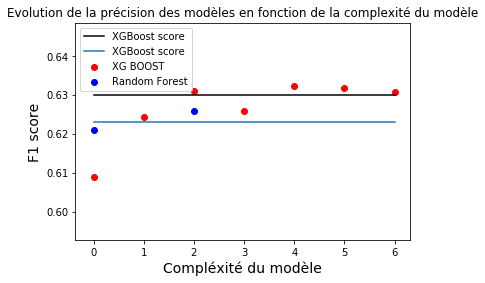

In [44]:

plt.scatter([0,1,2,3,4,5,6],[0.609,0.62444,0.63112,0.62604,0.63224,0.63171,0.63069], label = 'XG BOOST', c='r')
plt.scatter([0,2 ], [0.62102,0.62599] ,c='b', label = 'Random Forest')
plt.plot([0,6],[0.63,0.63],'k', label = 'XGBoost score')
plt.plot([0,6],[0.623,0.623], label = 'XGBoost score')
plt.title('Evolution de la précision des modèles en fonction de la complexité du modèle')
plt.xlabel('Compléxité du modèle', fontsize=14, color='black')
plt.ylabel('F1 score', fontsize=14, color='black')
plt.legend()
plt.show();
